### APE on average InfoNCE loss across all combinations

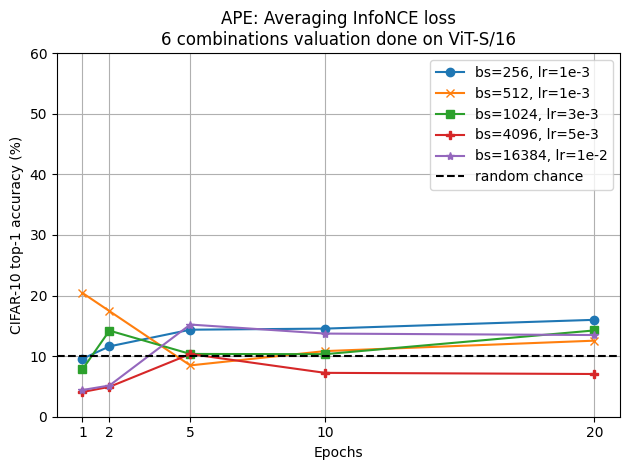

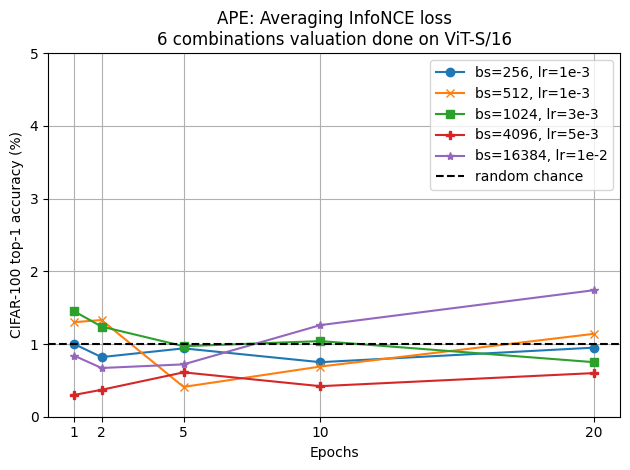

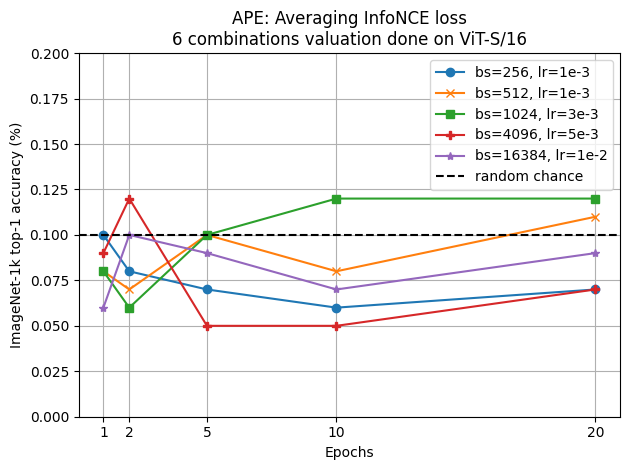

In [23]:
from pylab import plt

data_256 = {'exp_name': 'vits_bs-256_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 9.56, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_2': {'cifar10': 11.61, 'cifar100': 0.82, 'imagenet1k': 0.08}, 'epoch_5': {'cifar10': 14.36, 'cifar100': 0.94, 'imagenet1k': 0.07}, 'epoch_10': {'cifar10': 14.54, 'cifar100': 0.75, 'imagenet1k': 0.06}, 'epoch_20': {'cifar10': 15.99, 'cifar100': 0.95, 'imagenet1k': 0.07}}}
data_512 = {'exp_name': 'vits_bs-512_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 20.42, 'cifar100': 1.3, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 17.43, 'cifar100': 1.33, 'imagenet1k': 0.07}, 'epoch_5': {'cifar10': 8.47, 'cifar100': 0.41, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.83, 'cifar100': 0.69, 'imagenet1k': 0.08}, 'epoch_20': {'cifar10': 12.55, 'cifar100': 1.14, 'imagenet1k': 0.11}}}
data_1024 = {'exp_name': 'vits_bs-1024_lr-0.003', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 7.83, 'cifar100': 1.45, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 14.21, 'cifar100': 1.24, 'imagenet1k': 0.06}, 'epoch_5': {'cifar10': 10.36, 'cifar100': 0.97, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.32, 'cifar100': 1.04, 'imagenet1k': 0.12}, 'epoch_20': {'cifar10': 14.24, 'cifar100': 0.75, 'imagenet1k': 0.12}}}
data_4096 = {'exp_name': 'vits_bs-4096_lr-0.005', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.08, 'cifar100': 0.3, 'imagenet1k': 0.09}, 'epoch_2': {'cifar10': 4.93, 'cifar100': 0.37, 'imagenet1k': 0.12}, 'epoch_5': {'cifar10': 10.34, 'cifar100': 0.61, 'imagenet1k': 0.05}, 'epoch_10': {'cifar10': 7.24, 'cifar100': 0.42, 'imagenet1k': 0.05}, 'epoch_20': {'cifar10': 7.05, 'cifar100': 0.6, 'imagenet1k': 0.07}}}
data_16384 = {'exp_name': 'vits_bs-16384_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.41, 'cifar100': 0.84, 'imagenet1k': 0.06}, 'epoch_2': {'cifar10': 5.15, 'cifar100': 0.67, 'imagenet1k': 0.1}, 'epoch_5': {'cifar10': 15.21, 'cifar100': 0.72, 'imagenet1k': 0.09}, 'epoch_10': {'cifar10': 13.72, 'cifar100': 1.26, 'imagenet1k': 0.07}, 'epoch_20': {'cifar10': 13.48, 'cifar100': 1.74, 'imagenet1k': 0.09}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 60.0], "cifar100": [0.0, 5.0], "imagenet1k": [0.0, 0.2]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=1e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-3")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=3e-3")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=5e-3")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=1e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'APE: Averaging InfoNCE loss\n6 combinations valuation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()

### Full MLP H-Net (`num_ie=12`, `encoder_batch_size=4`) Batch ablation

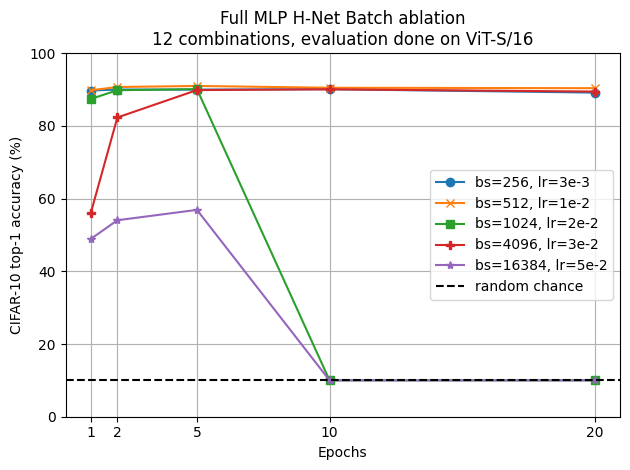

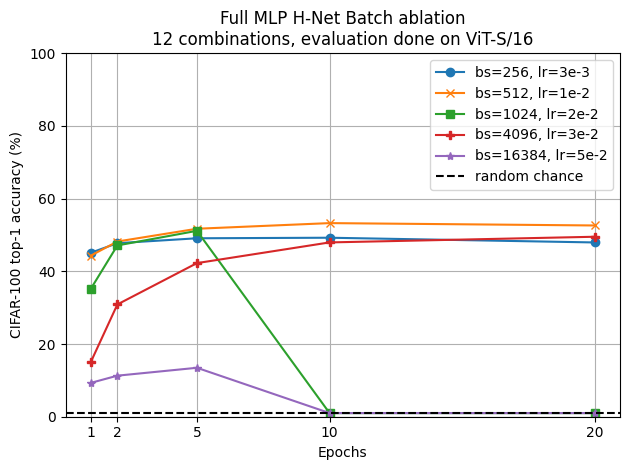

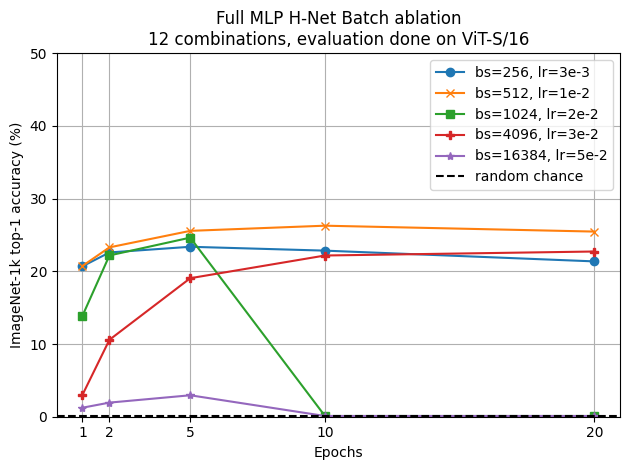

In [28]:
from pylab import plt


data_256 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-256_lr-3e-3', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.71, 'cifar100': 45.1, 'imagenet1k': 20.69}, 'epoch_2': {'cifar10': 89.99, 'cifar100': 47.73, 'imagenet1k': 22.59}, 'epoch_5': {'cifar10': 89.97, 'cifar100': 49.08, 'imagenet1k': 23.37}, 'epoch_10': {'cifar10': 90.08, 'cifar100': 49.23, 'imagenet1k': 22.84}, 'epoch_20': {'cifar10': 89.15, 'cifar100': 47.93, 'imagenet1k': 21.36}}}
data_512 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
data_1024 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-1024_lr-2e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 87.4, 'cifar100': 35.19, 'imagenet1k': 13.89}, 'epoch_2': {'cifar10': 89.8, 'cifar100': 47.11, 'imagenet1k': 22.18}, 'epoch_5': {'cifar10': 90.1, 'cifar100': 51.13, 'imagenet1k': 24.63}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}
data_4096 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-4096_lr-3e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 56.09, 'cifar100': 15.07, 'imagenet1k': 3.02}, 'epoch_2': {'cifar10': 82.3, 'cifar100': 30.88, 'imagenet1k': 10.58}, 'epoch_5': {'cifar10': 89.84, 'cifar100': 42.25, 'imagenet1k': 19.05}, 'epoch_10': {'cifar10': 90.05, 'cifar100': 47.94, 'imagenet1k': 22.17}, 'epoch_20': {'cifar10': 89.43, 'cifar100': 49.5, 'imagenet1k': 22.72}}} 
data_16384 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-16384_lr-5e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 48.91, 'cifar100': 9.31, 'imagenet1k': 1.24}, 'epoch_2': {'cifar10': 54.04, 'cifar100': 11.29, 'imagenet1k': 1.94}, 'epoch_5': {'cifar10': 56.89, 'cifar100': 13.46, 'imagenet1k': 2.95}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 50]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=3e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-2")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=2e-2")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=3e-2")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=5e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'Full MLP H-Net Batch ablation\n12 combinations, evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()


### Full MLP H-Net (`num_ie=12` `encoder_batch_size=4`) v/s APE

- One target model ViT-S/16
- Assume that APE was run for 12 combinations as well
- Take best h-params for both H-Net (`bs=512`, `lr=1e-2`) and APE (`bs=16384`, `lr=1e-2`)

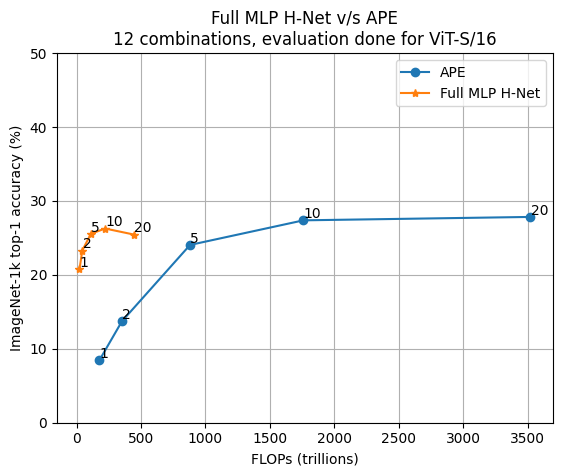

In [29]:
from pylab import plt

hnet = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
ape = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}
hnet_accs = [hnet["eval"][f"epoch_{e}"]["imagenet1k"] for e in [1, 2, 5, 10, 20]]
hnet_flops = [22.165 * e for e in [1, 2, 5, 10, 20]]

ape_accs = [ape["eval"][f"epoch_{e}"]["imagenet1k"] for e in [1, 2, 5, 10, 20]]
ape_flops = [14.675 * e * 12 for e in [1, 2, 5, 10, 20]]

plt.plot(ape_flops, ape_accs, label="APE", marker="o")
plt.plot(hnet_flops, hnet_accs, label="Full MLP H-Net", marker="*")
plt.xlabel("FLOPs (trillions)")
plt.ylabel("ImageNet-1k top-1 accuracy (%)")
plt.ylim([0.0, 50.0])
plt.legend()
plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title("Full MLP H-Net v/s APE\n12 combinations, evaluation done for ViT-S/16")

plt.show()


### Changing (scale of) text encoders

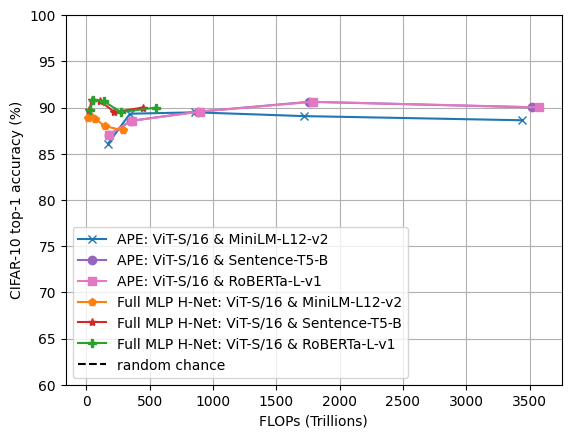

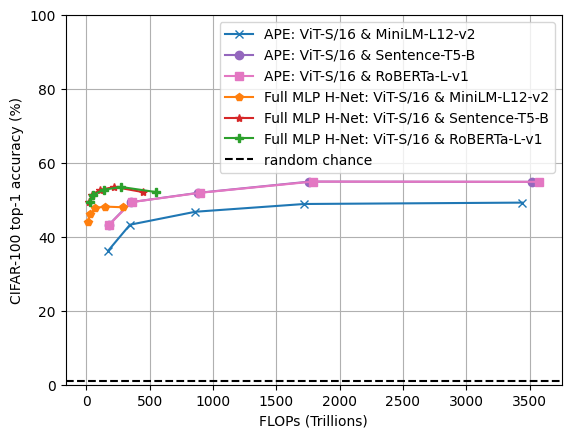

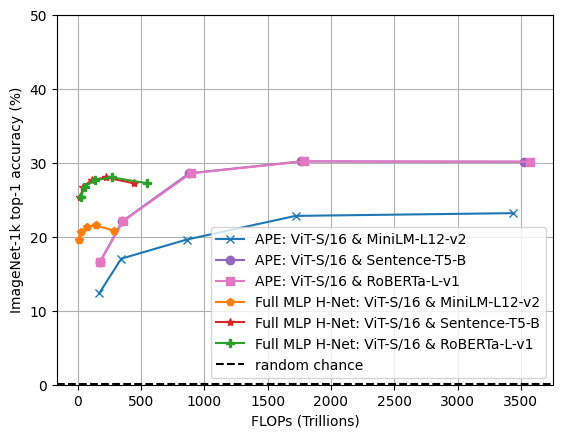

In [34]:
ape_minilm = {'exp_name': 'vit_small_patch16_224_all-MiniLM-L12-v2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 86.1, 'cifar100': 36.26, 'imagenet1k': 12.41}, 'epoch_2': {'cifar10': 89.33, 'cifar100': 43.29, 'imagenet1k': 17.05}, 'epoch_5': {'cifar10': 89.48, 'cifar100': 46.8, 'imagenet1k': 19.63}, 'epoch_10': {'cifar10': 89.07, 'cifar100': 48.9, 'imagenet1k': 22.84}, 'epoch_20': {'cifar10': 88.62, 'cifar100': 49.27, 'imagenet1k': 23.21}}}
ape_st5b = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}
ape_roberta = {'exp_name': 'vit_small_patch16_224_all-roberta-large-v1', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 87.06, 'cifar100': 43.23, 'imagenet1k': 16.61}, 'epoch_2': {'cifar10': 88.56, 'cifar100': 49.4, 'imagenet1k': 22.1}, 'epoch_5': {'cifar10': 89.55, 'cifar100': 51.91, 'imagenet1k': 28.6}, 'epoch_10': {'cifar10': 90.62, 'cifar100': 54.96, 'imagenet1k': 30.21}, 'epoch_20': {'cifar10': 90.02, 'cifar100': 54.89, 'imagenet1k': 30.17}}}

hnet_minilm = {'exp_name': 'allMiniLM_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 88.85, 'cifar100': 43.99, 'imagenet1k': 19.53}, 'epoch_2': {'cifar10': 89.07, 'cifar100': 46.19, 'imagenet1k': 20.6}, 'epoch_5': {'cifar10': 88.78, 'cifar100': 47.81, 'imagenet1k': 21.34}, 'epoch_10': {'cifar10': 88.0, 'cifar100': 48.2, 'imagenet1k': 21.54}, 'epoch_20': {'cifar10': 87.52, 'cifar100': 48.01, 'imagenet1k': 20.85}}}
hnet_st5b = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
hnet_roberta = {'exp_name': 'roberta_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.69, 'cifar100': 49.36, 'imagenet1k': 25.42}, 'epoch_2': {'cifar10': 90.85, 'cifar100': 51.43, 'imagenet1k': 26.76}, 'epoch_5': {'cifar10': 90.68, 'cifar100': 52.74, 'imagenet1k': 27.68}, 'epoch_10': {'cifar10': 89.5, 'cifar100': 53.51, 'imagenet1k': 28.04}, 'epoch_20': {'cifar10': 89.99, 'cifar100': 52.14, 'imagenet1k': 27.26}}}


benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [60, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 50]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

for bench in benchmarks:
    ape_acc1 = [ape_minilm["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops1 = [14.34 * e * 12 for e in epochs]

    ape_acc2 = [ape_st5b["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops2 = [14.676 * e * 12 for e in epochs]

    ape_acc3 = [ape_roberta["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops3 = [14.895 * e * 12 for e in epochs]


    hnet_acc1 = [hnet_minilm["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops1 = [14.4 * e for e in epochs]

    hnet_acc2 = [hnet_st5b["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops2 = [22.165 * e for e in epochs]

    hnet_acc3 = [hnet_roberta["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops3 = [27.34 * e for e in epochs]

    plt.plot(ape_flops1, ape_acc1, color="tab:blue", marker="x", label="APE: ViT-S/16 & MiniLM-L12-v2")
    plt.plot(ape_flops2, ape_acc3, color="tab:purple", marker="o", label="APE: ViT-S/16 & Sentence-T5-B")
    plt.plot(ape_flops3, ape_acc3, color="tab:pink", marker="s", label="APE: ViT-S/16 & RoBERTa-L-v1")


    plt.plot(hnet_flops1, hnet_acc1, color="tab:orange", marker="p", label="Full MLP H-Net: ViT-S/16 & MiniLM-L12-v2")
    plt.plot(hnet_flops2, hnet_acc3, color="tab:red", marker="*", label="Full MLP H-Net: ViT-S/16 & Sentence-T5-B")
    plt.plot(hnet_flops3, hnet_acc3, color="tab:green", marker="P", label="Full MLP H-Net: ViT-S/16 & RoBERTa-L-v1")

    plt.axhline(rcs[bench], linestyle="--", color="black", label="random chance")

    plt.legend()
    plt.ylim(lims[bench])
    plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
    plt.xlabel("FLOPs (Trillions)")
    plt.grid(True)
    plt.show()



### Changing training dataset scale

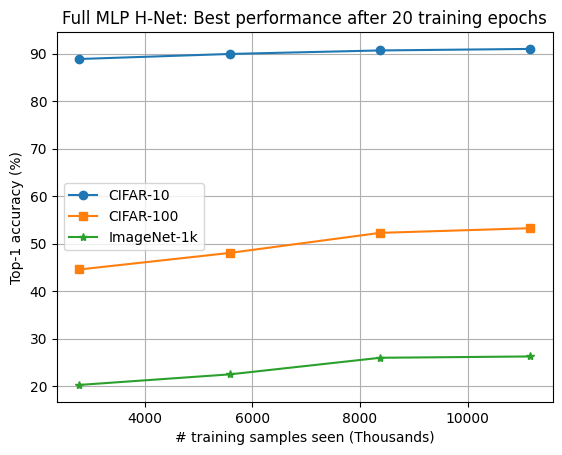

In [4]:

from pylab import plt

hnet_full = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
hnet_3_4 = {'exp_name': 'three-fourth_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.63, 'cifar100': 41.48, 'imagenet1k': 18.68}, 'epoch_2': {'cifar10': 90.37, 'cifar100': 46.22, 'imagenet1k': 22.09}, 'epoch_5': {'cifar10': 90.65, 'cifar100': 50.45, 'imagenet1k': 24.78}, 'epoch_10': {'cifar10': 90.31, 'cifar100': 52.27, 'imagenet1k': 25.99}, 'epoch_20': {'cifar10': 7.72, 'cifar100': 2.15, 'imagenet1k': 0.12}}}
hnet_1_2 = {'exp_name': 'half_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 86.9, 'cifar100': 35.39, 'imagenet1k': 13.88}, 'epoch_2': {'cifar10': 89.61, 'cifar100': 43.79, 'imagenet1k': 20.13}, 'epoch_5': {'cifar10': 89.91, 'cifar100': 46.86, 'imagenet1k': 22.34}, 'epoch_10': {'cifar10': 89.6, 'cifar100': 48.05, 'imagenet1k': 22.5}, 'epoch_20': {'cifar10': 7.94, 'cifar100': 1.1, 'imagenet1k': 0.07}}}
hnet_1_4 = {'exp_name': 'one-fourth_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 61.13, 'cifar100': 19.57, 'imagenet1k': 5.13}, 'epoch_2': {'cifar10': 85.89, 'cifar100': 36.12, 'imagenet1k': 14.11}, 'epoch_5': {'cifar10': 88.85, 'cifar100': 43.67, 'imagenet1k': 20.28}, 'epoch_10': {'cifar10': 88.29, 'cifar100': 44.57, 'imagenet1k': 20.13}, 'epoch_20': {'cifar10': 86.8, 'cifar100': 42.98, 'imagenet1k': 18.29}}}

dataset_size = 558128

x_vals = [round(dataset_size * r) * 20 * 1e-3 for r in [0.25, 0.5, 0.75, 1.0]]

c10 = [ [subitem["cifar10"] for subitem in item["eval"].values()] for item in [hnet_1_4, hnet_1_2, hnet_3_4, hnet_full] ]
c10 = [max(item) for item in c10]

plt.plot(x_vals, c10, marker="o", label="CIFAR-10")


c100 = [ [subitem["cifar100"] for subitem in item["eval"].values()] for item in [hnet_1_4, hnet_1_2, hnet_3_4, hnet_full] ]
c100 = [max(item) for item in c100]

plt.plot(x_vals, c100, marker="s", label="CIFAR-100")

ins = [ [subitem["imagenet1k"] for subitem in item["eval"].values()] for item in [hnet_1_4, hnet_1_2, hnet_3_4, hnet_full] ]
ins = [max(item) for item in ins]

plt.plot(x_vals, ins, marker="*", label="ImageNet-1k")
plt.ylabel("Top-1 accuracy (%)")
plt.xlabel("# training samples seen (Thousands)")
plt.title("Full MLP H-Net: Best performance after 20 training epochs")
plt.legend()
plt.grid(True)
plt.show()
